<a href="https://colab.research.google.com/github/saadkiet/RNN-and-LSTM-for-Image-Classifications/blob/master/RNN_and_LSTM_for_Image_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Installation and Setup

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 39.0MB/s 
     |████████████████████████████████| 450kB 37.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ac123060f4029ad0220f3ffb50d6549cc0b82ea8f0c4a504d21e826bb8575121
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstal

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Step 2 : Data Pre Processing

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

x_test and x_train contains all the images of numbers

And y_train and y_test contains the labels for these numbers

In [0]:
x_train.min(),x_train.max()

(0, 255)

In [0]:
y_train.min(),y_train.max()


(0, 9)

In [0]:
#Normalizing dataset
x_train=x_train/255.0
x_test=x_test/255.0

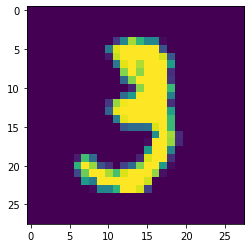

In [0]:
plt.imshow(x_train[10])

In [0]:
y_train[10]

3

#Step 3 : Building the LSTM

In [0]:
#Defning an Object (Initiallizing RNN)
model=tf.keras.models.Sequential()

In [0]:
#Adding 1st LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu',return_sequences=True,input_shape=(28,28)))

#Adding dropout layer
model.add(tf.keras.layers.Dropout(0.2)) #Dropout layer is a regularization technique which will avoid overfitting.

Lets understand return sequences, We want LSTM to return sequences. If we add a Dense layer after LSTM layer, the Dense layer wont understand the returned sequences.

Therefore we add another LSTM layer after this one.

In [0]:
#Adding 2nd LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu')) #We have removed return_sequences because we are not adding anymore LSTM layers after this and also we are adding Dense layer after this so we wont
#be needing anymore LSTM layer

#Adding dropout layer
model.add(tf.keras.layers.Dropout(0.2)) #Dropout layer is a regularization technique which will avoid overfitting.


In [0]:
#FC LAYERS.
model.add(tf.keras.layers.Dense(units=32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [0]:
#Adding output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#For binary output we use activation function as Sigmoid
#For multiple outputs we use activation function as softmax

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [0]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#loss will guide optimizer to find the global minimum.
#Meterics= accuracy will help us calculate the accuracy.

#Step 4 : Traning the Model

In [0]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.5812 - accuracy: 0.8111 - val_loss: 0.1389 - val_accuracy: 0.9593
Epoch 2/10
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.1631 - accuracy: 0.9550 - val_loss: 0.0960 - val_accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.1123 - accuracy: 0.9693 - val_loss: 0.0673 - val_accuracy: 0.9804
Epoch 4/10
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.0851 - accuracy: 0.9782 - val_loss: 0.0609 - val_accuracy: 0.9825
Epoch 5/10
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0751 - accuracy: 0.9802 - val_loss: 0.0582 - val_accuracy: 0.9835
Epoch 6/10
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0650 - accuracy: 0.9828 - val_loss: 0.0512 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [==========================

In [0]:
y_pred=model.predict_classes(x_test)

In [0]:
print(y_pred[10],y_test[10])

0 0


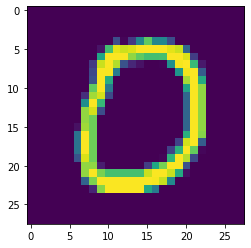

In [0]:
plt.imshow(x_test[10])

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 975    0    1    0    0    0    2    2    0    0]
 [   0 1128    1    0    0    1    1    4    0    0]
 [   1    4 1002    5    1    1    1   17    0    0]
 [   0    1    1  997    0    6    0    5    0    0]
 [   0    0    0    0  974    0    3    3    0    2]
 [   0    1    0    5    0  884    1    0    0    1]
 [   1    2    0    0    1    0  952    0    2    0]
 [   0    2    2    0    0    0    0 1023    0    1]
 [   1    1    3    1    0    2    1    2  963    0]
 [   0    1    0    4   27    4    0    9    6  958]]


In [0]:
acc_s=accuracy_score(y_pred,y_test)
print(acc_s)

0.9856


#Step 5 : Learning Curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

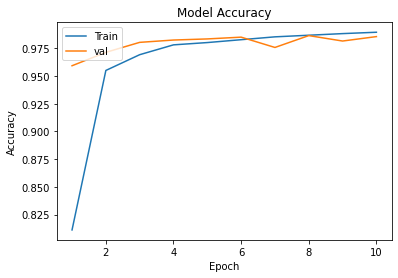

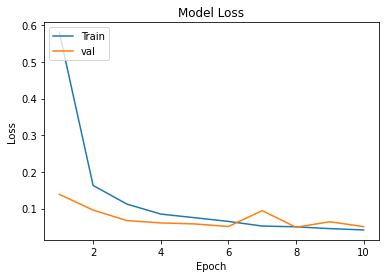

In [0]:
learning_curve(history,10)